Oliver W. Layton

Fall 2020

CS343: Neural Networks

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Tensorflow 2.0 tutorial

It is important that you have Tensorflow 2.0 installed. The older version 1.X will NOT work for this class and is completely incompatible.

You can install it on your laptop via pip: `pip3 install tensorflow`.

*Not at all necessary: If you have a powerful (CUDA-compatible) GPU on your computer, run Windows 10/Linux, and want to bother with the time-consuming process for installing the GPU-optimized version of Tensorflow, see http://cs.colby.edu/courses/F20/cs343/software.html#gpuInstall. Note that there are no "bonus points" for doing this. If you're unsure whether your GPU supports CUDA, check out https://developer.nvidia.com/cuda-gpus.*

The following should print:

    Tensorflow version 2.3.0

In [2]:
import tensorflow as tf

print('Tensorflow version', tf.__version__)

Tensorflow version 2.3.0


#### Tensorflow 2.0 API

**Super, super helpful reference:** https://www.tensorflow.org/api_docs/python

#### WARNING

Most non-tensorflow.org code/references online/textbooks is still tensorflow 1.X. Be careful to not get confused with incompatibility.

## Tensorflow's Tensor datatype

Let's go over how to create a tensor and perform some common operations.

### Creating a tensor

In [3]:
# zeros
tf.zeros((5, 9))

<tf.Tensor: shape=(5, 9), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [4]:
# ones
tf.ones(shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [5]:
# random: gaussian
tf.random.normal(shape=(10, 1))

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.771],
       [-1.095],
       [ 0.887],
       [ 1.514],
       [-0.317],
       [ 0.681],
       [ 1.296],
       [-0.221],
       [ 0.664],
       [-0.764]], dtype=float32)>

In [6]:
# random: uniform float. Specify minval/maxval
tf.random.uniform(shape=(10, 5))

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[0.59 , 0.279, 0.679, 0.786, 0.927],
       [0.269, 0.771, 0.292, 0.367, 0.541],
       [0.463, 0.069, 0.151, 0.677, 0.025],
       [0.988, 0.494, 0.27 , 0.927, 0.805],
       [0.498, 0.343, 0.595, 0.513, 0.13 ],
       [0.787, 0.951, 0.001, 0.297, 0.871],
       [0.94 , 0.451, 0.667, 0.415, 0.079],
       [0.824, 0.995, 0.898, 0.778, 0.989],
       [0.255, 0.794, 0.557, 0.726, 0.592],
       [0.605, 0.09 , 0.939, 0.577, 0.712]], dtype=float32)>

In [7]:
tf.random.uniform(shape=(10, 5), minval=10, maxval=100)

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[13.026, 34.039, 45.79 , 17.821, 97.379],
       [49.569, 31.507, 81.811, 56.946, 36.195],
       [66.918, 92.642, 82.232, 74.544, 19.044],
       [20.783, 38.422, 82.725, 82.726, 95.741],
       [74.967, 12.927, 45.23 , 54.233, 33.178],
       [59.842, 16.091, 41.727, 79.078, 38.229],
       [29.003, 32.989, 21.928, 29.335, 51.026],
       [74.823, 66.097, 14.098, 61.3  , 82.934],
       [86.497, 19.478, 12.791, 21.109, 13.   ],
       [73.034, 85.966, 71.551, 18.314, 75.429]], dtype=float32)>

In [8]:
# random: uniform int
tf.random.uniform(shape=(10, 5), dtype=tf.int32, maxval=100, minval=10)

<tf.Tensor: shape=(10, 5), dtype=int32, numpy=
array([[45, 81, 14, 93, 69],
       [55, 38, 60, 55, 98],
       [97, 16, 25, 78, 27],
       [25, 64, 79, 54, 17],
       [42, 49, 45, 47, 52],
       [48, 91, 86, 83, 31],
       [51, 66, 89, 69, 39],
       [79, 75, 97, 21, 10],
       [16, 95, 37, 66, 32],
       [78, 67, 28, 65, 76]])>

In [9]:
# Creating a tf tensor based on a int/float
tf.Variable(10)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>

In [10]:
# Creating a tf tensor based on a python list
myTensor = tf.Variable([1, 2, 3, 4])
myTensor

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>

In [11]:
# create tensor from numpy ndarray
import numpy as np
randNums = np.random.randn(5,5)
print('Numpy version:\n',randNums)
tfNums = tf.Variable(randNums)
print('TensorFlow version:\n',tfNums)

Numpy version:
 [[-0.067 -0.664 -1.579  0.911 -1.437]
 [ 0.369 -0.716 -0.62  -2.256  1.48 ]
 [-0.849 -2.445  0.554  1.225  1.008]
 [ 0.301 -0.985 -1.037 -0.269 -0.227]
 [-0.903 -0.58  -0.832 -1.274 -1.338]]
TensorFlow version:
 <tf.Variable 'Variable:0' shape=(5, 5) dtype=float64, numpy=
array([[-0.067, -0.664, -1.579,  0.911, -1.437],
       [ 0.369, -0.716, -0.62 , -2.256,  1.48 ],
       [-0.849, -2.445,  0.554,  1.225,  1.008],
       [ 0.301, -0.985, -1.037, -0.269, -0.227],
       [-0.903, -0.58 , -0.832, -1.274, -1.338]])>


In [12]:
myData = [0, 1, 3]
npArr = np.array(myData)
# print(npArr + npArr)
# print(myData + myData)

### Basic operations

In [13]:
# printing
tf.print(tfNums)

[[-0.066643142957076629 -0.66409239146968457 -1.5785533182994438 0.91122503564394042 -1.4369384080726288]
 [0.36930139216385555 -0.71597904965251813 -0.6200239317296713 -2.255516388708299 1.4796723809285637]
 [-0.84853820532760948 -2.4447682211416635 0.55449462652926229 1.2251335401767269 1.00842841849577]
 [0.30107136845667437 -0.98525106410308538 -1.0366140142410645 -0.26870211713754494 -0.22655604797467155]
 [-0.90306552098138626 -0.57962493949100535 -0.83206193993165334 -1.2735011080516061 -1.3383298138916557]]


In [14]:
# converting a tf tensor to a numpy array
backToNp = tfNums.numpy()
print(backToNp) # this is a np ndarray

[[-0.067 -0.664 -1.579  0.911 -1.437]
 [ 0.369 -0.716 -0.62  -2.256  1.48 ]
 [-0.849 -2.445  0.554  1.225  1.008]
 [ 0.301 -0.985 -1.037 -0.269 -0.227]
 [-0.903 -0.58  -0.832 -1.274 -1.338]]


In [15]:
# generate range
myRange = tf.range(10, 20)
myRange

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])>

In [16]:
# arithmetic: adding, subtracting, multiplication/division
myRange + myRange

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38])>

In [17]:
myRange - myRange

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [18]:
2*myRange

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38])>

In [19]:
5 + myRange

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])>

#### Assignment

In [20]:
# You slice like python
myRange[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [21]:
myRange[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([10, 11, 12, 13, 14])>

In [22]:
# but you cannot do assignment like python. crash:
myRange[0] = 9999
# Avoid assigning parts of a tensor...it's a headache

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [23]:
myRange == myRange[0]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False, False, False, False, False, False, False, False,
       False])>

In [24]:
# assignment hack: use tf.where. e.g. replace the value 0 with 100 in a tensor
myRangeChanged = tf.where(myRange == myRange[0], 9999, myRange)
myRangeChanged

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([9999,   11,   12,   13,   14,   15,   16,   17,   18,   19])>

#### Selecting values by indices

Slicing works like numpy — but what if you want to index into non-contiguous indices? e.g. at index 3 and 5 for axis=2?

Example: 
Original tensor shape=(3,4,**6**,7)

Goal (after indexing): shape=(3,4,**2**,7)

(if this were 2D, like selecting all rows, but only 2 columns)

In [25]:
myTensor[0,0,3]

InvalidArgumentError: Index out of range using input dim 1; input has only 1 dims [Op:StridedSlice] name: strided_slice/

In [26]:
myTensor[0,0,5]

InvalidArgumentError: Index out of range using input dim 1; input has only 1 dims [Op:StridedSlice] name: strided_slice/

In [27]:
tf.random.set_seed(0)
myTensor = tf.random.normal(shape=(3,4, 6, 7))
tf.print(myTensor.shape)

myTensorSelected = tf.gather(myTensor, [3, 5], axis=2)
myTensorSelected.shape

TensorShape([3, 4, 6, 7])


TensorShape([3, 4, 2, 7])

In [28]:
myTensorSelected[0,0]

<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[ 1.589, -0.796,  0.078, -0.179, -0.86 ,  0.219,  0.714],
       [ 0.234, -0.117,  1.028,  0.328,  0.266, -1.336, -1.694]],
      dtype=float32)>

Slightly different problem: Select a (non-contiguous) list of individual elements from a tensor.

Specify by a list of subscript indices (e.g. [0,0,0] to access top left element of a 3D tensor).

In [29]:
# test has shape=(2,2,2)
test = tf.Variable([[[10, 11], [12, 13]], [[99, 100], [101, 102]]])
tf.print(test)
tf.print(test.shape)

tf.gather_nd(test, [[0,0,0], [1,1,1]])

[[[10 11]
  [12 13]]

 [[99 100]
  [101 102]]]
TensorShape([2, 2, 2])


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 10, 102])>

#### Memory

In [30]:
# noteworthy memory point so you're aware:
# Taking a tensor and modifying it via arithmetic creates a NEW tensor in memory
test2 = test + 1
print(test)
print(test2)

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=int32, numpy=
array([[[ 10,  11],
        [ 12,  13]],

       [[ 99, 100],
        [101, 102]]])>
tf.Tensor(
[[[ 11  12]
  [ 13  14]]

 [[100 101]
  [102 103]]], shape=(2, 2, 2), dtype=int32)


#### Checking shapes

In [31]:
# Checking shapes
test.shape

TensorShape([2, 2, 2])

In [32]:
# can slice TensorShape objects as you'd expect
test.shape[:2]

TensorShape([2, 2])

In [33]:
# use as_list() method to get a python list of shape back
test.shape.as_list()

[2, 2, 2]

In [34]:
list(test.shape)

[2, 2, 2]

### Useful operations for neural networks

#### Reduce

In [35]:
# often you have a multi-dimensional tensor and want to sum up all elements into a single
# scalar value (reduce)
t = tf.ones(shape=(5, 5, 5))
tf.reduce_sum(t)

<tf.Tensor: shape=(), dtype=float32, numpy=125.0>

In [36]:
# can do mean, max, min, etc
randT = tf.random.uniform(shape=(100, 10))
tf.reduce_max(randT)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9967114>

In [37]:
# Each reduce command supports an axis like numpy
ran = tf.random.normal(shape=(3,4,5))
tf.reduce_sum(ran, axis=1).shape

TensorShape([3, 5])

#### clip values outside a range

In [38]:
randData = tf.random.uniform(shape=(10, 10))
print(randData)
print(tf.clip_by_value(randData, -0.5, 0.2))

tf.Tensor(
[[0.175 0.318 0.856 0.417 0.236 0.226 0.599 0.829 0.598 0.489]
 [0.117 0.408 0.121 0.937 0.236 0.803 0.094 0.072 0.084 0.204]
 [0.641 0.741 0.699 0.637 0.747 0.684 0.691 0.791 0.829 0.596]
 [0.235 0.332 0.014 0.713 0.213 0.976 0.183 0.154 0.077 0.819]
 [0.736 0.899 0.548 0.477 0.806 0.791 0.17  0.871 0.335 0.806]
 [0.957 0.397 0.149 0.779 0.592 0.876 0.385 0.1   0.356 0.518]
 [0.139 0.02  0.166 0.07  0.34  0.864 0.08  0.298 0.399 0.506]
 [0.825 0.531 0.063 0.967 0.862 0.877 0.23  0.207 0.892 0.498]
 [0.587 0.472 0.462 0.33  0.346 0.4   0.337 0.928 0.617 0.339]
 [0.363 0.846 0.765 0.349 0.539 0.007 0.865 0.316 0.203 0.273]], shape=(10, 10), dtype=float32)
tf.Tensor(
[[0.175 0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2  ]
 [0.117 0.2   0.121 0.2   0.2   0.2   0.094 0.072 0.084 0.2  ]
 [0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2  ]
 [0.2   0.2   0.014 0.2   0.2   0.2   0.183 0.154 0.077 0.2  ]
 [0.2   0.2   0.2   0.2   0.2   0.2   0.17  0.2   0.2   0.2  ]


#### Adding a singleton (batch) dimension

In [39]:
tf.expand_dims(randData, axis=0)

<tf.Tensor: shape=(1, 10, 10), dtype=float32, numpy=
array([[[0.175, 0.318, 0.856, 0.417, 0.236, 0.226, 0.599, 0.829, 0.598,
         0.489],
        [0.117, 0.408, 0.121, 0.937, 0.236, 0.803, 0.094, 0.072, 0.084,
         0.204],
        [0.641, 0.741, 0.699, 0.637, 0.747, 0.684, 0.691, 0.791, 0.829,
         0.596],
        [0.235, 0.332, 0.014, 0.713, 0.213, 0.976, 0.183, 0.154, 0.077,
         0.819],
        [0.736, 0.899, 0.548, 0.477, 0.806, 0.791, 0.17 , 0.871, 0.335,
         0.806],
        [0.957, 0.397, 0.149, 0.779, 0.592, 0.876, 0.385, 0.1  , 0.356,
         0.518],
        [0.139, 0.02 , 0.166, 0.07 , 0.34 , 0.864, 0.08 , 0.298, 0.399,
         0.506],
        [0.825, 0.531, 0.063, 0.967, 0.862, 0.877, 0.23 , 0.207, 0.892,
         0.498],
        [0.587, 0.472, 0.462, 0.33 , 0.346, 0.4  , 0.337, 0.928, 0.617,
         0.339],
        [0.363, 0.846, 0.765, 0.349, 0.539, 0.007, 0.865, 0.316, 0.203,
         0.273]]], dtype=float32)>

#### squeeze

In [40]:
# squeeze works too
tf.squeeze(tf.expand_dims(randData, axis=0))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0.175, 0.318, 0.856, 0.417, 0.236, 0.226, 0.599, 0.829, 0.598,
        0.489],
       [0.117, 0.408, 0.121, 0.937, 0.236, 0.803, 0.094, 0.072, 0.084,
        0.204],
       [0.641, 0.741, 0.699, 0.637, 0.747, 0.684, 0.691, 0.791, 0.829,
        0.596],
       [0.235, 0.332, 0.014, 0.713, 0.213, 0.976, 0.183, 0.154, 0.077,
        0.819],
       [0.736, 0.899, 0.548, 0.477, 0.806, 0.791, 0.17 , 0.871, 0.335,
        0.806],
       [0.957, 0.397, 0.149, 0.779, 0.592, 0.876, 0.385, 0.1  , 0.356,
        0.518],
       [0.139, 0.02 , 0.166, 0.07 , 0.34 , 0.864, 0.08 , 0.298, 0.399,
        0.506],
       [0.825, 0.531, 0.063, 0.967, 0.862, 0.877, 0.23 , 0.207, 0.892,
        0.498],
       [0.587, 0.472, 0.462, 0.33 , 0.346, 0.4  , 0.337, 0.928, 0.617,
        0.339],
       [0.363, 0.846, 0.765, 0.349, 0.539, 0.007, 0.865, 0.316, 0.203,
        0.273]], dtype=float32)>

## Building a neural network with Tensorflow's low-level API

Let's build a MLP with the low-level Tensorflow API and do a forward pass.
Let's have the following layers:

    Dense netIn / ReLu netAct ->
    Dense netIn / Sigmoid netAct ->
    Dense netIn / Softmax netAct (input has C classes)

MLP, forward, loss, gradient tape

### Dummy image input

**TODO**:
- For input, let's make some random images.
- For classes `y`, let's pick random numbers from `C=10` classes

**NOTE:** One oddity is that Tensorflow likes the color channel in this format `(img_y, img_x, n_chans)`. We of course have been using `(n_chans, img_y, img_x)`, which is the convention for other neural network APIs (e.g. PyTorch and others). There is no "right" way: we just need to remember to be flexible in our ways :)

In [41]:
32*32*3

3072

In [42]:
N = 20
img_y = 32
img_x = 32
n_chans = 3
C = 10

# gaussian inputs
inputs = tf.random.normal(shape=(N, img_y, img_x, n_chans))

# classes need to be Nx1 for broadcast-ability later on
y = tf.random.uniform(shape=(N, 1), maxval=C, dtype=tf.int32)

print(f'Inputs have shape {inputs.shape}')
print(f'Class assignments:\n{y}')

Inputs have shape (20, 32, 32, 3)
Class assignments:
[[3]
 [3]
 [8]
 [0]
 [6]
 [5]
 [7]
 [0]
 [7]
 [8]
 [4]
 [2]
 [2]
 [6]
 [6]
 [2]
 [1]
 [3]
 [4]
 [5]]


### Flatten non-batch dims

Like any MLP, we can only pass in 1D non-batch features. We need to flatten non-batch dims. Let's write a simple function to do this

In [43]:
def flatten(x):
    '''Flattens non-batch dims of input
    
    Parameters:
    -----------
    x: tf tensor. shape=(N, dim1, dim2, dim3, ...)
    
    Returns:
    -----------
    xf: tf tensor. shape=(N, dim1*dim2*dim3*...)
    '''
    return tf.reshape(x, (x.shape[0], -1))
#     return tf.reshape(x, (x.shape[0], tf.reduce_prod(x.shape[1:])))

In [44]:
# Define 'features' to be flattened inputs
features = flatten(inputs)
print(flatten(inputs).shape)

(20, 3072)


In [45]:
# for convenience, define variable for num_features
num_features = features.shape[1]  # M
num_features

3072

### Define hyperparameters for network architecture

In [46]:
H1 = 10# num hidden units in L1 (1st hidden layer)
H2 = 30# num hidden units in L2 (2nd hidden layer)

### Define wts and bias for each layer

3 sets of Gaussian random wts and bias for `l1`, `l2` and `l3` (output layer)

MLP: inputs= (N, M)
wts: (M, H)
Hidden layer activation/net_ins = (N, H1)

In [47]:
l1_wts = tf.Variable(tf.random.normal(shape=(num_features, H1)))
l1_b = tf.Variable(tf.random.normal(shape=(H1,)))
l2_wts = tf.Variable(tf.random.normal(shape=(H1, H2)))
l2_b = tf.Variable(tf.random.normal(shape=(H2,)))
l3_wts = tf.Variable(tf.random.normal(shape=(H2, C)))
l3_b = tf.Variable(tf.random.normal(shape=(C,)))

### Do forward pass, compute loss

Notes:
- Remember, `Dense` is just a dot product (aka matrix multiply)
- `tf.nn` has lots of activation functions

In [48]:
# Layer 1: Dense netIn
l1_net_in = features @ l1_wts + l1_b
# Layer 1: ReLU
l1_net_act = tf.nn.relu(l1_net_in)
# Layer 2: Dense netIn
l2_net_in = tf.matmul(l1_net_act, l2_wts) + l2_b
# Layer 2: Sigmoid
l2_net_act = tf.nn.sigmoid(l2_net_in)
# Layer 3: Dense netIn
l3_net_in = l2_net_act @ l3_wts + l3_b
# Layer 3: Softmax
l3_net_act = tf.nn.softmax(l3_net_in)

In [49]:
l3_net_act.shape # N, C

TensorShape([20, 10])

In [50]:
# probs that input 0 is of the 10 classes
tf.print(l3_net_act[0])

[0.000168275321 0.362662256 0.0108196316 ... 4.65844505e-06 0.000177064547 0.624224663]


In [51]:
tf.reduce_sum(l3_net_act[0])

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

**NOTE:**

- The common cross-entopy function in Tensorflow (`tf.nn.softmax_cross_entropy_with_logits(y, out_netIn)`) does the softmax calculation AND the cross-entropy calculation together. Therefore, we should pass it the outlayer layer NET_IN values, NOT the NET_ACT values (we could just not compute the NET_ACT ourselves).
- This tensorflow loss function returns the loss PER SAMPLE. We need to average them across the batch ourselves

In [52]:
# compute softmax and cross-entropy loss
loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
# print(loss)
loss = tf.reduce_mean(loss)
tf.print(loss)

255.182907


### Full forward and backward pass

#### Let's copy-paste forward code (minus output netAct) into the following function

In [53]:
def forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b):
    # Layer 1: Dense netIn
    l1_net_in = features @ l1_wts + l1_b
    # Layer 1: ReLU
    l1_net_act = tf.nn.relu(l1_net_in)
    # Layer 2: Dense netIn
    l2_net_in = tf.matmul(l1_net_act, l2_wts) + l2_b
    # Layer 2: Sigmoid
    l2_net_act = tf.nn.sigmoid(l2_net_in)
    # Layer 3: Dense netIn
    l3_net_in = l2_net_act @ l3_wts + l3_b
    return l3_net_in

In [54]:
features @ l1_wts
# d_l1_wts: features
# d_features: l1_wts

<tf.Tensor: shape=(20, 10), dtype=float32, numpy=
array([[-111.272,   37.844,  -26.049,  -27.784,  -85.19 ,  -89.108,
        -125.946, -140.74 ,  -10.863,  -58.757],
       [ -48.065,   74.806,  -58.658,  -46.752,  -27.401,    5.943,
         -35.219,  112.903,  -17.044,  -17.729],
       [  -2.262,    7.106,  -16.476,   53.241,  -35.558,   22.562,
           3.692,   43.859,  -84.446,  -11.055],
       [ -78.573,   10.192,   75.037,   11.851,  -59.247,  -48.523,
           4.367,   33.369,  -48.263,  -13.429],
       [ -95.508,  -33.798,   51.02 ,  -24.183, -108.825,  -20.498,
          21.471,   81.52 ,   -8.952,    9.376],
       [  48.802,  -65.643,  -67.214,  -11.627,  -13.962,   15.723,
          -5.269,  -51.627,   -6.16 ,   25.914],
       [ -26.849,  -21.997,    0.696,   14.216,  -14.769,    0.026,
          56.808,  -55.101,   27.675,  -21.502],
       [ -44.638,   53.112,    7.271,   -4.849,  -54.034,   78.837,
         -43.117,   25.127,   42.825,   27.449],
       [ -91.7

#### Backward pass

**SURPRISE:** Tensorflow computes the gradients automatically for us if we compute the forward pass while in 'gradient recording mode' (`GradientTape` block). 

This magic is called **reverse-mode automatic differentiation**:
- Tensorflow creates a graph of all weight/bias variables (like the network diagrams we often draw in class).
- As you compute forward pass, it records which operations/functions affect nodes in the graph.
- When it's done, it does backprop (similar to how we learned it): `d_upstream` * `partial derivative of current node in graph` to move to that node in the graph.

**Caveat:** To make a node in the graph, tensorflow needs a `tf.Variable`. This is why we needed to wrap the wts/bias in `tf.Variable`.

**TODO**
- Do forward pass, compute loss in a `GradientTape` session, get all the gradients

In [55]:
with tf.GradientTape() as tape:
    l3_net_in = forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b)
    loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
    loss = tf.reduce_mean(loss)
# get grads
grads = tape.gradient(loss, [l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b])

In [56]:
l1_wts.shape

TensorShape([3072, 10])

In [57]:
# e.g. check shape of l1_wts and d_l1_wts
d_l1_wts = grads[0]
d_l1_wts

<tf.Tensor: shape=(3072, 10), dtype=float32, numpy=
array([[ 0.05 , -0.641, -0.186, ..., -0.013, -0.435, -0.01 ],
       [ 0.059, -0.298, -0.195, ..., -0.018, -0.257, -0.085],
       [ 0.282,  0.043, -0.041, ...,  0.013, -0.008, -0.098],
       ...,
       [ 0.042, -0.197, -0.073, ..., -0.013, -0.166, -0.023],
       [ 0.07 , -0.233,  0.007, ..., -0.01 , -0.125,  0.06 ],
       [-0.055,  0.303,  0.064, ...,  0.022,  0.228,  0.033]],
      dtype=float32)>

In [58]:
d_l1_b = grads[1]
d_l1_b

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.165, -0.278,  0.046,  0.001, -0.045,  0.242, -0.024, -0.005,
       -0.083,  0.192], dtype=float32)>

In [59]:
l1_b.shape

TensorShape([10])

##### Trick: Calling gradient more than once

Notice above how we computed all the wt/bias gradients at once in a list. This was intentional. The `GradientTape` only stores gradients in memory for one call of `tape.gradient`: afterwards, the tape goes blank

In [60]:
with tf.GradientTape() as tape:
    l3_net_in = forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b)
    loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
    loss = tf.reduce_mean(loss)
# get grads
d_l1_wts = tape.gradient(loss, l1_wts)
print(d_l1_wts)
# Call gradient more than once -> crash

d_l2_wts = tape.gradient(loss, l2_wts)

tf.Tensor(
[[ 0.05  -0.641 -0.186 ... -0.013 -0.435 -0.01 ]
 [ 0.059 -0.298 -0.195 ... -0.018 -0.257 -0.085]
 [ 0.282  0.043 -0.041 ...  0.013 -0.008 -0.098]
 ...
 [ 0.042 -0.197 -0.073 ... -0.013 -0.166 -0.023]
 [ 0.07  -0.233  0.007 ... -0.01  -0.125  0.06 ]
 [-0.055  0.303  0.064 ...  0.022  0.228  0.033]], shape=(3072, 10), dtype=float32)


RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

Fix: use `persistent=True` optional parameter.

This makes the gradients stay in memory until `tape` is garbage collected. Good idea in cases like this where `tape` is GCed only when notebook closed to use Python `del` operator to delete when we're done

In [61]:
with tf.GradientTape(persistent=True) as tape:
    l3_net_in = forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b)
    loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
    loss = tf.reduce_mean(loss)
# get grads
d_l1_wts = tape.gradient(loss, l1_wts)
# print(d_l1_wts)
# Call gradient more than once -> crash

d_l2_wts = tape.gradient(loss, l2_wts)

print(d_l1_wts.shape)
print(d_l2_wts.shape)


(3072, 10)
(10, 30)


##### Update wts using gradients

- Re-execute original backward pass cell.
- Loop thru wts/bias and corresponding gradients, update the weights via gradient descent.


**NOTE about -=:** 
- Does't exist in tensorflow.
- `thing = thing - d_thing` doesn't mutate (change) `thing` it copies everything over as a new object in memory. This is wasteful.
- If `thing` is a `tf.Variable`, we can update its value via `thing.assign_sub(d_thing)` (-=). ("sub" for subtract. There is a `assign_add` for addition).

In [62]:
# This is wasteful! Reallocating memory every time we hit assignment statement
l1_wts = l1_wts - 0.1*d_l1_wts

In [67]:
# -= operator not defined in TensorFlow
l1_wts -= 0.1*d_l1_wts

In [68]:
l1_wts.assign_sub(0.1*d_l1_wts)
print(l1_wts)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign_sub'

In [52]:
wt_vars = [l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b]

with tf.GradientTape() as tape:
    l3_net_in = forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b)
    loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
    loss = tf.reduce_mean(loss)
# get grads
grads = tape.gradient(loss, wt_vars)

In [68]:
lr = 1e-1
for i in range(len(wt_vars)):
    wt_vars[i].assign_sub(lr*grads[i])
wt_vars[1]

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([-1.638,  0.992,  0.381,  1.211,  0.814,  0.118, -1.428,  0.847,
        0.821, -1.848], dtype=float32)>

**NOTE:**
- If doing conv2d early in the network, remember to use 'SAME' boundary conditions and to flatten non-batch dims before entering `Dense` layers (like in Project 3).

## Tensorflow's high level Keras Sequential API


**Pros of low-level API:**
- Numpy-like flexibility with designing your network, with library access to common netAct/loss functions.
- Can implement whatever layer/net connectivity and training protocol/bells/whistles that you like

**Cons of low-level API:**
- Even though netIn/netAct calculations are relatively easy to implement as the programmer, you still need to write lots of boilerplate code every time (e.g. initialize wt/bias tensors, record gradients/unpack them, write main training loop, etc.). 

###  `Keras::Sequential` API

- Very high level.
- Allows you to configure common network layers with netIn/netAct in very few lines of code.
- Abstracts away wt/bias initializtion, performance metric calculation, training loop, etc.
- Useful for prototyping/trying different network architectures to solve a problem without investing time to implement lots of code specific to each netIn/netAct/num layers.

The following functions are commonly used in the Keras Sequential API:

- https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary

### Implementing MLP in `Keras::Sequential` 

    Dense netIn / ReLu netAct ->
    Dense netIn / Sigmoid netAct ->
    Dense netIn / Softmax netAct (input has C classes)

#### Set up inputs once again

Let's also define a random test and validation set

In [69]:
N = 20
img_y = 32
img_x = 32
n_chans = 3
C = 10

M = img_y*img_x*n_chans

# gaussian inputs
inputs = tf.random.normal(shape=(N, img_y, img_x, n_chans))
inputs_train_flat = flatten(inputs)

# gaussian test inputs
inputs_test = tf.random.normal(shape=(N//2, img_y, img_x, n_chans))
inputs_test_flat = flatten(inputs_test)

# gaussian validation inputs
inputs_val = tf.random.normal(shape=(N//2, img_y, img_x, n_chans))
inputs_val_flat = flatten(inputs_val)

# classes need to be Nx1 for broadcast-ability later on
y = tf.random.uniform(shape=(N,1), maxval=C, dtype=tf.int32)
y_test = tf.random.uniform(shape=(N//2,1), maxval=C, dtype=tf.int32)
y_val = tf.random.uniform(shape=(N//2,1), maxval=C, dtype=tf.int32)

print(f'Inputs have shape {inputs.shape}')
print(f'Inputs have shape {inputs_train_flat.shape}')
print(f'Class assignments:\n{y}')

Inputs have shape (20, 32, 32, 3)
Inputs have shape (20, 3072)
Class assignments:
[[3]
 [5]
 [1]
 [6]
 [7]
 [2]
 [0]
 [4]
 [5]
 [6]
 [6]
 [2]
 [9]
 [8]
 [2]
 [2]
 [9]
 [7]
 [6]
 [7]]


#### Step 1) `Keras::Sequential`  network construction

Idea: Make a sequential list of layer objects.

**NOTES:**
- Need Flatten layer when going from 2D+ input to Dense layer (also needed between Conv/Pooling layers and Dense MLP layers).
- When specifying the `input_shape` in the first layer, do not include batch dimension.
- Easy to check a summary of the network architecture afterwards


    Dense netIn / ReLu netAct ->
    Dense netIn / Sigmoid netAct ->
    Dense netIn / Softmax netAct (input has C classes)

In [70]:
H1 = 10# num hidden units in L1 (1st hidden layer)
H2 = 30# num hidden units in L2 (2nd hidden layer)

In [71]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.InputLayer(input_shape=(M,)))
net.add(tf.keras.layers.Dense(units=H1, activation='relu'))
net.add(tf.keras.layers.Dense(units=H2, activation='sigmoid'))
net.add(tf.keras.layers.Dense(units=C, activation='softmax'))

net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 31,370
Trainable params: 31,370
Non-trainable params: 0
_________________________________________________________________


#### Step 2) Compile `Keras::Sequential`  network object

Like in the CNN project, `model.compile` allows us to specify the optimizer. For tensorflow, we also specify the loss and the performance metrics we want `Keras` to keep track of for us (remember, we abstract away the training loop, so we can't add calls to compute accuracy/loss when we want).

Lets use:
- Optimizer: adam https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Loss: cross entropy loss appropriate for int-coded classes ("sparse categorical") (not one-hot coded). https://www.tensorflow.org/api_docs/python/tf/keras/losses
- Metrics: accuracy https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [72]:
adam = tf.optimizers.Adam(lr=1e-2)

In [73]:
net.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
# control lr yourself:
net.compile(optimizer=adam, loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

#### Step 3) Fit model 

Common things to set:
- batch size (4)
- num epochs (50)
- validation data (optional)

In [76]:
hist = net.fit(inputs_train_flat, y, batch_size=4, epochs=50, validation_data=(inputs_val_flat, y_val))

Epoch 1/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 3.6670 - val_accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.6700 - val_accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 3.6742 - val_accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 3.6772 - val_accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.6800 - val_accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 3.6823 - val_accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 3.6864 - val_accuracy: 0.2000
Epoch 8/50
5/5 [==================

Plot training performance metrics using history output. Common metrics:
- loss
- accuracy
- val_accuracy
- val_loss

In [77]:
import matplotlib.pyplot as plt

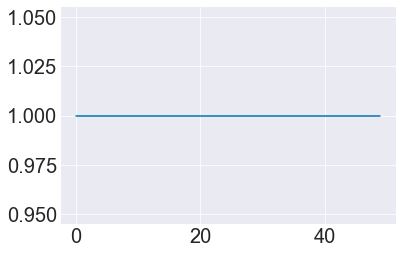

In [78]:
plt.plot(hist.history['accuracy'])
plt.show()

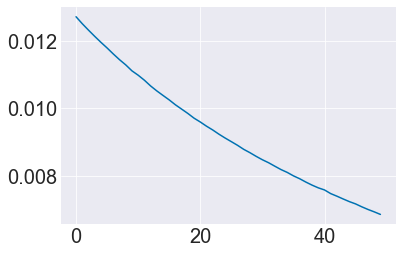

In [79]:
plt.plot(hist.history['loss'])
plt.show()

#### Step 4) Evaluate network on test set

In [84]:
loss, acc = net.evaluate(inputs_test_flat, y_test)
print(f'Test loss {loss} and accuracy {acc}')

1/1 [==============================] - 0s 1ms/step - loss: 3.5525 - accuracy: 0.3000
Test loss 3.5525259971618652 and accuracy 0.30000001192092896


#### Step 5) (optional) Get class probabilities of test input

- `predict()` method

(10, 10)


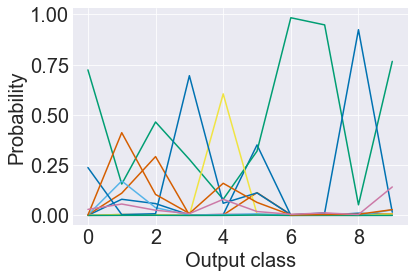

In [85]:
pred = net.predict(inputs_test_flat)
print(pred.shape)
plt.plot(pred)
plt.xlabel('Output class')
plt.ylabel('Probability')
plt.show()

## Transfer learning with pre-trained models

- As you now know first-hand, training a deep neural network can take lots of time! Fortunately, you often don't need to train a large CNN yourself. - Tensorflow makes it easy to download pre-trained `Keras::Sequential` models published by researchers. Here is a list of ones easily downloadable: https://www.tensorflow.org/api_docs/python/tf/keras/applications
- You can download these models and run your data thru them easily. We will use the `MobileNetV2` model here.
- **Problem:** This is fine if you are classifying the same dataset used by the researchers who trained the net...but your problem will usually differ from theirs. You can't expect the network to perform well at handwriting recognition (e.g. MNIST) if the net was trained on outdoor images (e.g. ImageNet). 
- **Solution:** If you have a dataset that is similar to that used in a pre-trained model (e.g. classifying flower types here), we can do something called **transfer learning** to try and repurpose parts of the pre-trained net and make small changes to adapt it to our application.

### Load flower dataset

In [1]:
import load_flower_dataset

ModuleNotFoundError: No module named 'load_flower_dataset'

In [82]:
flower_yh[1]

NameError: name 'flower_yh' is not defined

In [90]:
class_names

array(['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips'],
      dtype='<U10')

In [87]:
flower_x, flower_y, flower_yh, class_names = load_flower_dataset.load()
input_nonbatch_shape = flower_x.shape[1:]
C = len(class_names)

print(f'Flower dataset shape: {flower_x.shape}')
print(f'Flower one-hot coded classes shape: {flower_yh.shape}')
print(f'Flower class names: {class_names}')

Processing roses 641 images
Processing sunflowers 699 images
Processing daisy 633 images
Processing dandelion 898 images
Processing tulips 799 images
Flower dataset shape: (3670, 224, 224, 3)
Flower one-hot coded classes shape: (3670, 5)
Flower class names: ['roses' 'sunflowers' 'daisy' 'dandelion' 'tulips']


### Load in MobileNetV2

Make sure it can't be trained.

In [91]:
input_nonbatch_shape

(224, 224, 3)

In [92]:
model = tf.keras.applications.MobileNetV2(input_shape=input_nonbatch_shape,
                                               weights='imagenet')
model.trainable = False
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

### Visualize images next to ground-truth labels

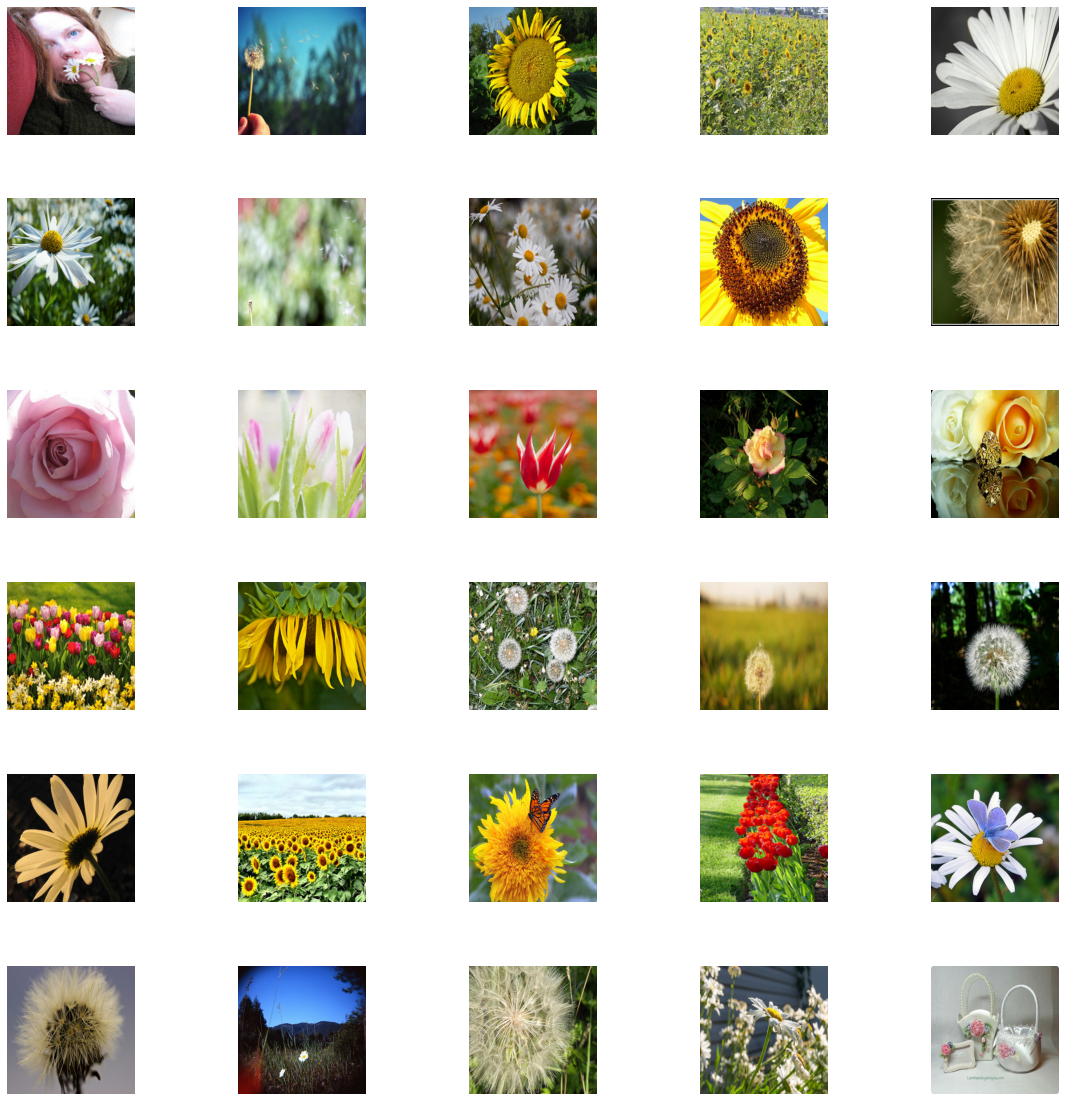

In [94]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(flower_x[n])
#   plt.title(oob_preds[n])
  plt.axis('off')
#   plt.suptitle("Class predictions")
plt.show()

### Do surgery on the net: chop off trained output layer, tack on new untrained `Dense` output layer (`C` neurons)

#### Load in MobileNetV2 without the classification layer (output layer)

In [95]:
model = tf.keras.applications.MobileNetV2(input_shape=input_nonbatch_shape,
                                               include_top=False,
                                               weights='imagenet')
model.trainable = False
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

#### Tack on new Dense layer with `C` neurons

- Remember to specify activation function

In [96]:
C

5

In [98]:
aug_model = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=C, activation='softmax')
    ]
)
aug_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 313605    
Total params: 2,571,589
Trainable params: 313,605
Non-trainable params: 2,257,984
_________________________________________________________________


#### Compile the net with adam, categorical_crossentropy loss (for softmax / one-hot coded classes)

In [99]:
# Compile model with adam optimizer, categorical_crossentropy, accuracy
# look at summary for number of trainable wts (should be output layer only)
aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#### Evaluate accuracy with untrained classification (output) layer

In [100]:
loss, acc = aug_model.evaluate(flower_x[:100], flower_yh[:100], verbose=0)
print(f'Accuracy: {acc}, Loss: {loss}')

Accuracy: 0.25999999046325684, Loss: 2.12628173828125


#### Check "out of box" predictions in augmented network with untrained output layer

In [101]:
# net_act for last layer
probs = aug_model.predict(flower_x[:30])

In [103]:
probs.shape

(30, 5)

In [107]:
probs[2]

array([0.156, 0.582, 0.025, 0.029, 0.208], dtype=float32)

In [111]:
preds = tf.argmax(probs, axis=1)
preds

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([1, 1, 1, 4, 3, 1, 4, 1, 0, 1, 0, 1, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       2, 0, 3, 1, 0, 1, 1, 0])>

In [112]:
preds.numpy()

array([1, 1, 1, 4, 3, 1, 4, 1, 0, 1, 0, 1, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       2, 0, 3, 1, 0, 1, 1, 0])

In [114]:
class_names

array(['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips'],
      dtype='<U10')

In [115]:
oob_preds = class_names[preds.numpy()]

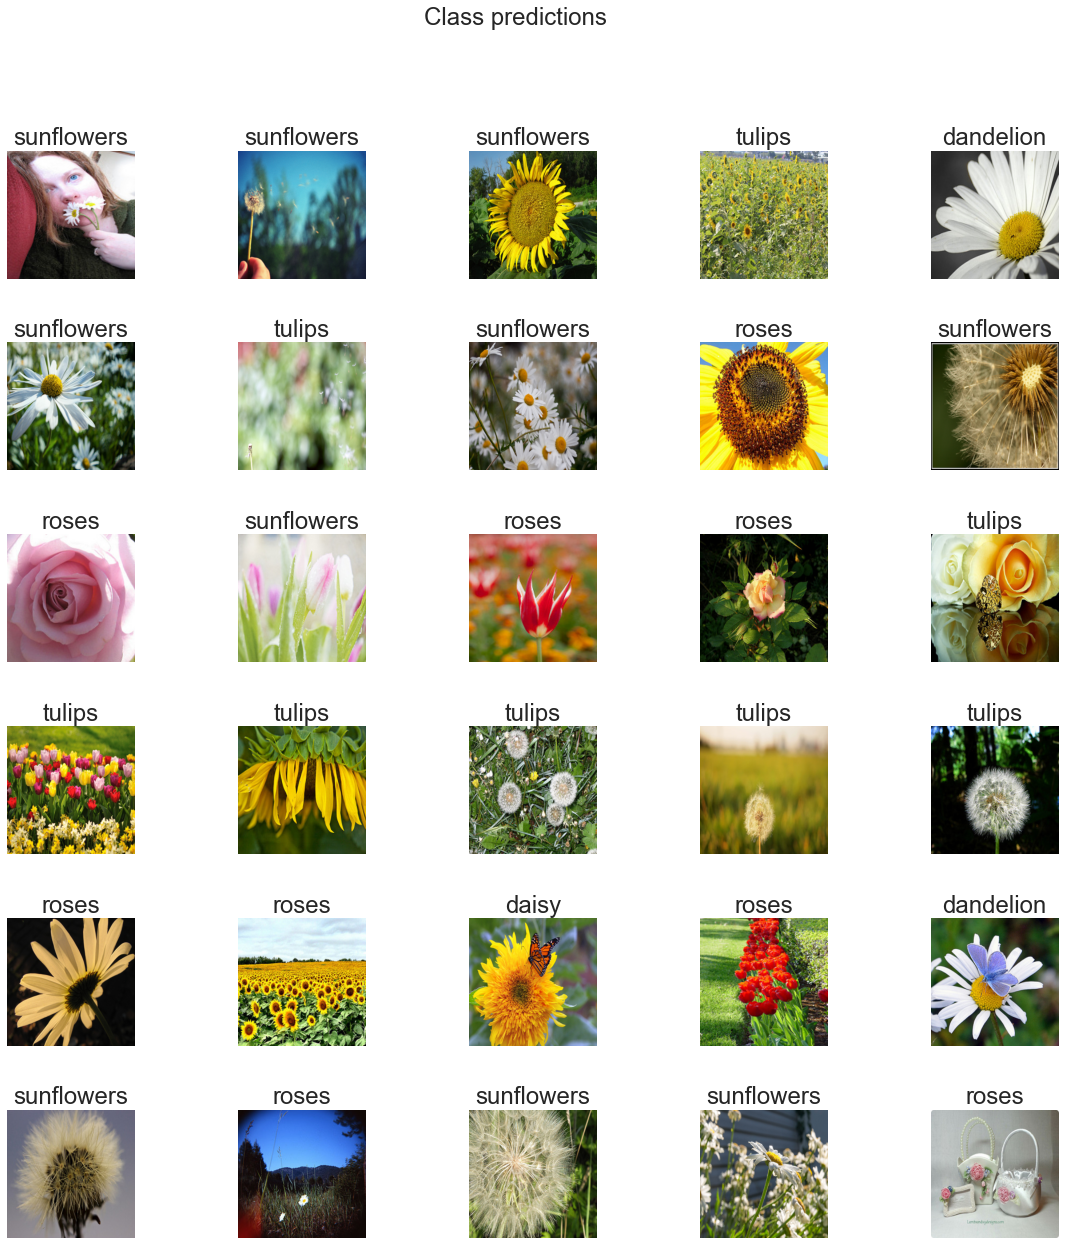

In [116]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(flower_x[n])
  plt.title(oob_preds[n])
  plt.axis('off')
  plt.suptitle("Class predictions")
plt.show()

#### Train the output layer wts only on the flower data

In [306]:
hist = aug_model.fit(flower_x, flower_yh,
                     epochs=5,
                     verbose=2,
                     batch_size=32)

Train on 3670 samples
Epoch 1/5
3670/3670 - 120s - loss: 2.6820 - accuracy: 0.7455
Epoch 2/5
3670/3670 - 113s - loss: 0.9008 - accuracy: 0.9054
Epoch 3/5
3670/3670 - 111s - loss: 0.6861 - accuracy: 0.9259
Epoch 4/5
3670/3670 - 110s - loss: 0.3525 - accuracy: 0.9569
Epoch 5/5
3670/3670 - 108s - loss: 0.4332 - accuracy: 0.9553


#### Evaluate accuracy with trained classification (output) layer

In [307]:
loss, acc = aug_model.evaluate(flower_x[:100], flower_yh[:100], verbose=0)
print(f'Accuracy: {acc}, Loss: {loss}')

Accuracy: 0.8500000238418579, Loss: 1.9312762069702147


#### Visualize predicted labels next to input images

In [308]:
probs = aug_model.predict(flower_x[:30])
preds = class_names[flower_y[np.argmax(probs, axis=1)]]

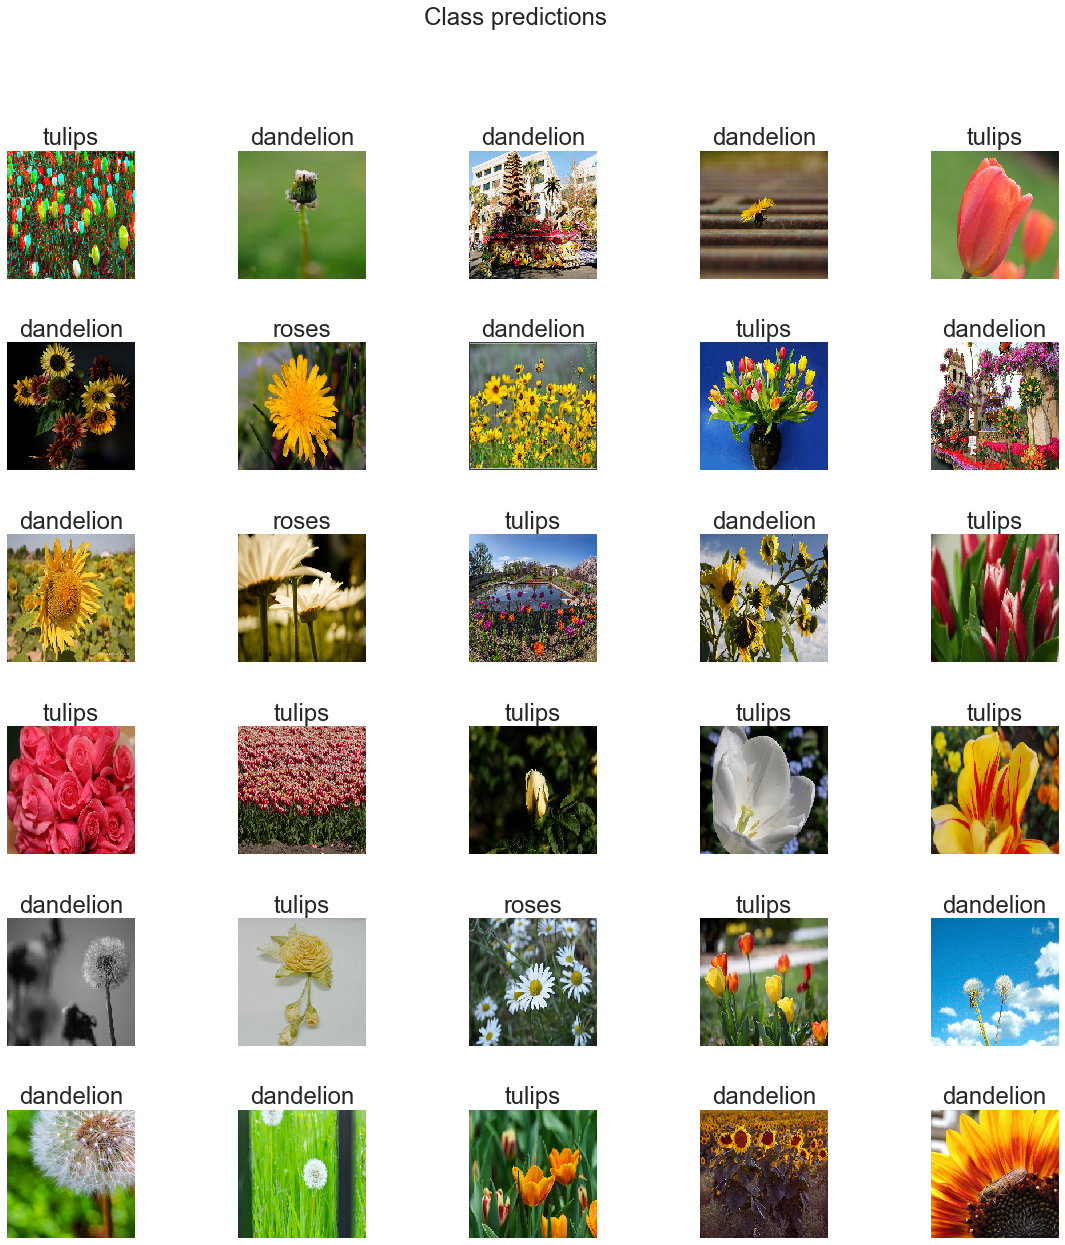

In [309]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(flower_x[n])
  plt.title(class_names[flower_y][n])
  plt.axis('off')
  plt.suptitle("Class predictions")
plt.show()